<a href="https://colab.research.google.com/github/Nagmashaik123/Nagma_INFO5731_Spring2021/blob/main/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 3/16/2021)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [17]:
# Write your code here
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import re
from pprint import pprint



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
!pip install pyLDAvis

In [20]:
# Importing Gensim module
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Importing Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

# Importing spacy
import spacy

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [21]:
# Processing Stop words using NLTK
from nltk.corpus import stopwords
stopWordsProc = stopwords.words('english')
stopWordsProc.extend(['from', 'subject', 're', 'edu', 'use'])

In [22]:
df = pd.read_csv('/content/nlp_articles.csv')
df.head(100)

,Unnamed: 0,Titles
0,0,\n Foundations of statistical...
1,1,\n A Maximum Entropy approach...
2,2,\nNatural Language Processing\n
3,3,\n Linguistics and Natural La...
4,4,\nNatural Language Processing\n
...,...,...
95,95,\n A Workbench for Developing...
96,96,\nNatural Language Processing and its Use in E...
97,97,\n Neural Network Computing a...
98,98,\n Text Statistics Tool Box F...


In [23]:
# Converting  to the  list
titleList = df.Titles.values.tolist()

# Processing to remove new line characters
dataSet = [re.sub('\s+', ' ', item) for item in titleList]

In [8]:
def wordsFromSent(statements):
    for statement in statements:
        yield(gensim.utils.simple_preprocess(str(statement), deacc=True))

processedWords = list(wordsFromSent(dataSet))

print(processedWords)

[['foundations', 'of', 'statistical', 'natural', 'language', 'processing'], ['maximum', 'entropy', 'approach', 'to', 'natural', 'language', 'processing'], ['natural', 'language', 'processing'], ['linguistics', 'and', 'natural', 'language', 'processing'], ['natural', 'language', 'processing'], ['natural', 'language', 'processing', 'almost', 'from', 'scratch'], ['natural', 'language', 'processing'], ['natural', 'language', 'processing', 'robotics'], ['tutorial', 'on', 'natural', 'language', 'processing'], ['ambiguities', 'in', 'natural', 'language', 'processing'], ['statistical', 'natural', 'language', 'processing'], ['natural', 'language', 'processing', 'for', 'information', 'retrieval'], ['natural', 'language', 'processing'], ['natural', 'language', 'processing', 'of', 'lyrics'], ['transformation', 'based', 'error', 'driven', 'learning', 'and', 'natural', 'language', 'processing', 'case', 'study', 'in', 'part', 'of', 'speech', 'tagging'], ['connectionist', 'natural', 'language', 'proce

In [24]:
# Bigram and Trigram models processing
bigram = gensim.models.Phrases(processedWords, min_count=5, threshold=90) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[processedWords], threshold=90)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigramModel = gensim.models.phrases.Phraser(bigram)
trigramModel = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigramModel[bigramModel[processedWords[0]]])

['foundations', 'of', 'statistical', 'natural', 'language', 'processing']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [25]:
# Functions for stopwords, bigrams, trigrams and lemmatization
def stopwords_process(data):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopWordsProc] for doc in data]

def bigrams_building(data):
    return [bigramModel[doc] for doc in data]

def trigrams_building(data):
    return [trigramModel[bigramModel[doc]] for doc in data]

def lemmatization_process(data, allowed_postags=['VERB','NOUN', 'ADJ', 'ADV']):
    """https://spacy.io/api/annotation"""
    textsList = []
    for item in data:
        doc = nlp(" ".join(item)) 
        textsList.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return textsList

In [26]:
# Stop Words processing
data_stopwords_process = stopwords_process(processedWords)

# Building Bigrams data
data_words_bigrams = bigrams_building(data_stopwords_process)

nlp = spacy.load('en', disable=['parser', 'ner'])

# Implementing lemmatization 
lemmatized_data = lemmatization_process(data_words_bigrams, allowed_postags=['VERB','NOUN', 'ADJ', 'ADV'])

print(lemmatized_data)

[['foundation', 'statistical', 'natural', 'language', 'processing'], ['maximum', 'entropy', 'approach', 'natural', 'language', 'processing'], ['natural', 'language', 'processing'], ['natural', 'language', 'processing'], ['natural', 'language', 'processing'], ['natural', 'language', 'processing', 'almost', 'scratch'], ['natural', 'language', 'processing'], ['natural', 'language', 'processing', 'robotic'], ['natural', 'language', 'processing'], ['ambiguity', 'natural', 'language', 'processing'], ['statistical', 'natural', 'language', 'processing'], ['natural', 'language', 'processing', 'retrieval'], ['natural', 'language', 'processing'], ['natural', 'language', 'processing', 'lyric'], ['transformation', 'base', 'error', 'drive', 'learn', 'natural', 'language', 'processing', 'case', 'study', 'speech', 'tagging'], ['natural', 'language', 'processing'], ['language', 'processing'], ['natural', 'language', 'processing'], ['natural', 'language', 'processing', 'introduction'], ['natural', 'lang

In [27]:
# Creating dictionary  for lematized dataset
wordsVal = corpora.Dictionary(lemmatized_data)

# Create Corpus
textsVal = lemmatized_data

# Term Document Frequency
corpusData = [wordsVal.doc2bow(text) for text in textsVal]

# printing corpus
print(corpusData)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(1, 1), (2, 1), (3, 1), (5, 1), (6, 1), (7, 1)], [(1, 1), (2, 1), (3, 1)], [(1, 1), (2, 1), (3, 1)], [(1, 1), (2, 1), (3, 1)], [(1, 1), (2, 1), (3, 1), (8, 1), (9, 1)], [(1, 1), (2, 1), (3, 1)], [(1, 1), (2, 1), (3, 1), (10, 1)], [(1, 1), (2, 1), (3, 1)], [(1, 1), (2, 1), (3, 1), (11, 1)], [(1, 1), (2, 1), (3, 1), (4, 1)], [(1, 1), (2, 1), (3, 1), (12, 1)], [(1, 1), (2, 1), (3, 1)], [(1, 1), (2, 1), (3, 1), (13, 1)], [(1, 1), (2, 1), (3, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(1, 1), (2, 1), (3, 1)], [(1, 1), (3, 1)], [(1, 1), (2, 1), (3, 1)], [(1, 1), (2, 1), (3, 1), (23, 1)], [(1, 1), (2, 1), (3, 1)], [(1, 1), (2, 1), (3, 1)], [(1, 1), (2, 1), (3, 1), (24, 1), (25, 1)], [(1, 1), (2, 1), (3, 1)], [(1, 1), (2, 1), (3, 1), (26, 1), (27, 1)], [(1, 1), (2, 1), (3, 1), (28, 1), (29, 1)], [(1, 1), (2, 1), (3, 1), (30, 1), (31, 1)], [(1, 1), (2, 1), (3, 1), (28, 1), (32, 1)], [(1, 1), (2, 1), (3, 1), 

In [28]:
# Human readable format of corpus (term-frequency)
[[(wordsVal[item], freq) for item, freq in corp] for corp in corpusData]

[[('foundation', 1),
  ('language', 1),
  ('natural', 1),
  ('processing', 1),
  ('statistical', 1)],
 [('language', 1),
  ('natural', 1),
  ('processing', 1),
  ('approach', 1),
  ('entropy', 1),
  ('maximum', 1)],
 [('language', 1), ('natural', 1), ('processing', 1)],
 [('language', 1), ('natural', 1), ('processing', 1)],
 [('language', 1), ('natural', 1), ('processing', 1)],
 [('language', 1),
  ('natural', 1),
  ('processing', 1),
  ('almost', 1),
  ('scratch', 1)],
 [('language', 1), ('natural', 1), ('processing', 1)],
 [('language', 1), ('natural', 1), ('processing', 1), ('robotic', 1)],
 [('language', 1), ('natural', 1), ('processing', 1)],
 [('language', 1), ('natural', 1), ('processing', 1), ('ambiguity', 1)],
 [('language', 1), ('natural', 1), ('processing', 1), ('statistical', 1)],
 [('language', 1), ('natural', 1), ('processing', 1), ('retrieval', 1)],
 [('language', 1), ('natural', 1), ('processing', 1)],
 [('language', 1), ('natural', 1), ('processing', 1), ('lyric', 1)],

In [33]:
# Build LDA model
model_data = gensim.models.ldamodel.LdaModel(corpus=corpusData,
                                           id2word=wordsVal,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [34]:
# Print the Keyword in the 10 topics
pprint(model_data.print_topics())
doc_lda = model_data[corpusData]

[(0,
  '0.111*"natural" + 0.111*"processing" + 0.109*"language" + 0.071*"retrieval" '
  '+ 0.019*"speech" + 0.019*"base" + 0.019*"error" + 0.019*"drive" + '
  '0.019*"case" + 0.019*"transformation"'),
 (1,
  '0.009*"natural" + 0.009*"language" + 0.009*"processing" + 0.009*"learn" + '
  '0.009*"system" + 0.009*"retrieval" + 0.009*"use" + 0.009*"statistical" + '
  '0.009*"machine" + 0.009*"logic"'),
 (2,
  '0.126*"issue" + 0.067*"engineer" + 0.067*"current" + 0.064*"software" + '
  '0.010*"processing" + 0.010*"language" + 0.009*"natural" + 0.006*"learn" + '
  '0.006*"retrieval" + 0.006*"use"'),
 (3,
  '0.257*"language" + 0.248*"processing" + 0.247*"natural" + 0.023*"learn" + '
  '0.010*"use" + 0.009*"statistical" + 0.008*"logic" + 0.006*"tool" + '
  '0.006*"assist" + 0.006*"recognition"'),
 (4,
  '0.143*"natural" + 0.143*"processing" + 0.141*"language" + 0.044*"approach" '
  '+ 0.016*"semantic" + 0.016*"statistic" + 0.016*"parse" + 0.016*"analysis" + '
  '0.016*"box" + 0.016*"transducer"

In [35]:
# Computing the  Perplexity of the data populated
print('\nPerplexity Analysis: ', model_data.log_perplexity(corpusData))  

#  Coherence Scoring analysis
coherence_model_lda = CoherenceModel(model=model_data, texts=lemmatized_data, dictionary=wordsVal, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nMeasure of Coherence Score: ', coherence_lda)


Perplexity Analysis:  -3.668541614170913

Measure of Coherence Score:  0.5886706800527357


In [36]:
# Visualizing the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_data, corpusData, wordsVal)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.310926  0.014893       1        1  71.092830
4      0.170392  0.065059       2        1   9.994650
0      0.134030 -0.096526       3        1   7.982290
8     -0.102339  0.090356       4        1   2.367749
2     -0.093805 -0.002263       5        1   1.785932
5     -0.087563 -0.030129       6        1   1.785237
6     -0.082128 -0.014784       7        1   1.422511
7     -0.089393 -0.020653       8        1   1.382285
9     -0.087410 -0.008440       9        1   1.378619
1     -0.072710  0.002486      10        1   0.807899, topic_info=           Term       Freq      Total Category  logprob  loglift
3    processing  91.000000  91.000000  Default  30.0000  30.0000
2       natural  90.000000  90.000000  Default  29.0000  29.0000
1      language  93.000000  93.000000  Default  28.0000  28.0000
18        learn   8.000000   8.000000  Default  27.0000  27.0000
25       system   3.000000   3.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
49      network   0.032245   1.657815  Topic10  -4.7362   0.8786
59         plan   0.032245   2.477015  Topic10  -4.7362   0.4770
60  recognition   0.032245   2.477015  Topic10  -4.7362   0.4770
64       assist   0.032245   2.477015  Topic10  -4.7362   0.4770
65     computer   0.032245   2.477015  Topic10  -4.7362   0.4770

[535 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
81        2  0.838221   adaptive
8         1  0.662482     almost
11        1  0.662482  ambiguity
89        2  0.838221   analysis
36        2  0.838219        ant
...     ...       ...        ...
86        3  0.849685    triumph
102       1  0.662482      upper
27        1  0.723783        use
27        3  0.241261        use
107       1  0.662482  workbench

[118 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 9, 3, 6, 7, 8, 10, 2])

In [37]:
!wget "http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip"
!unzip "/content/mallet-2.0.8.zip"

--2021-03-18 00:46:51--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  11.0MB/s    in 1.4s    

2021-03-18 00:46:52 (11.0 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  /content/mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/te

In [38]:
mallet_path = '/content/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpusData, num_topics=20, id2word=wordsVal)

In [39]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=lemmatized_data, dictionary=wordsVal, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\ncoherence Measurement: ', coherence_ldamallet)


[(10,
  [('processing', 0.9166666666666666),
   ('network', 0.041666666666666664),
   ('limitation', 0.041666666666666664),
   ('process', 0.0),
   ('coverage', 0.0),
   ('programming', 0.0),
   ('multitask', 0.0),
   ('thoughttreasure', 0.0),
   ('neural', 0.0),
   ('apply', 0.0)]),
 (17,
  [('language', 0.75),
   ('ant', 0.05),
   ('maximum', 0.05),
   ('nltk', 0.05),
   ('software', 0.05),
   ('learning', 0.05),
   ('multitask', 0.0),
   ('neural', 0.0),
   ('process', 0.0),
   ('robust', 0.0)]),
 (1,
  [('language', 0.8095238095238095),
   ('case', 0.047619047619047616),
   ('speech', 0.047619047619047616),
   ('map', 0.047619047619047616),
   ('large', 0.047619047619047616),
   ('multitask', 0.0),
   ('coverage', 0.0),
   ('programming', 0.0),
   ('broad', 0.0),
   ('neural', 0.0)]),
 (2,
  [('natural', 0.75),
   ('teaching', 0.03571428571428571),
   ('assist', 0.03571428571428571),
   ('model', 0.03571428571428571),
   ('transducer', 0.03571428571428571),
   ('overview', 0.035714

In [40]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        modelData = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpusData, num_topics=num_topics, id2word=wordsVal)
        model_list.append(modelData)
        coherencemodel = CoherenceModel(model=modelData, texts=lemmatized_data, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [41]:
model_list, coherence_values = compute_coherence_values(dictionary=wordsVal, corpus=corpusData, texts=lemmatized_data, start=2, limit=40, step=6)

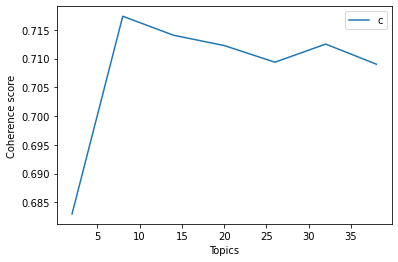

In [43]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [44]:
# Evaluating coherence score
for m, cv in zip(x, coherence_values):
    print("Topics =", m, " has a Coherence Value of", round(cv, 2))

Topics = 2  has a Coherence Value of 0.68
Topics = 8  has a Coherence Value of 0.72
Topics = 14  has a Coherence Value of 0.71
Topics = 20  has a Coherence Value of 0.71
Topics = 26  has a Coherence Value of 0.71
Topics = 32  has a Coherence Value of 0.71
Topics = 38  has a Coherence Value of 0.71


In [45]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.793*"processing" + 0.034*"transducer" + 0.034*"base" + 0.034*"case" + '
  '0.034*"parallelism" + 0.034*"deep" + 0.034*"language" + 0.000*"process" + '
  '0.000*"robust" + 0.000*"context"'),
 (1,
  '0.750*"natural" + 0.042*"learning" + 0.042*"thoughttreasure" + '
  '0.042*"introduction" + 0.042*"study" + 0.042*"toolkit" + 0.042*"structure" '
  '+ 0.000*"process" + 0.000*"neural" + 0.000*"robust"'),
 (2,
  '0.632*"processing" + 0.105*"machine" + 0.053*"coverage" + 0.053*"frame" + '
  '0.053*"complexity" + 0.053*"base" + 0.053*"group" + 0.000*"neural" + '
  '0.000*"multitask" + 0.000*"context"'),
 (3,
  '0.739*"language" + 0.087*"tool" + 0.043*"current" + 0.043*"lexicon" + '
  '0.043*"model" + 0.043*"large" + 0.000*"neural" + 0.000*"multitask" + '
  '0.000*"robust" + 0.000*"adaptive"'),
 (4,
  '0.724*"natural" + 0.069*"recognition" + 0.034*"commercial" + '
  '0.034*"historical" + 0.034*"decomposable" + 0.034*"method" + 0.034*"deep" + '
  '0.034*"requirement" + 0.000*"programming

In [47]:
def format_topics_sentences(ldamodel=model_data, corpus=corpusData, texts=lemmatized_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpusData]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,2), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpusData, texts=lemmatized_data)
                                                  
                                                  
                                                  
                                                  

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['DocumentNo', 'DominantTopic', 'Topic_Perc_Contrib', 'Keywords','Text']

# Show
df_dominant_topic.head(100)

,DocumentNo,DominantTopic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.07,"natural, approach, organize, foundation, neura...","[foundation, statistical, natural, language, p..."
1,1,8.0,0.06,"natural, approach, organize, foundation, neura...","[maximum, entropy, approach, natural, language..."
2,2,19.0,0.06,"processing, education, visual, modeling, confi...","[natural, language, processing]"
3,3,8.0,0.06,"natural, approach, organize, foundation, neura...","[natural, language, processing]"
4,4,1.0,0.05,"natural, learning, thoughttreasure, introducti...","[natural, language, processing]"
...,...,...,...,...,...
95,95,7.0,0.06,"learn, develop, network, section, error, evalu...","[workbench, develop, natural, language, proces..."
96,96,19.0,0.06,"processing, education, visual, modeling, confi...","[natural, language, processing, education]"
97,97,14.0,0.07,"language, network, biomedical, model, adaptive...","[neural, compute, natural, language, processing]"
98,98,16.0,0.07,"language, logic, issue, upper, computer, conte...","[text, statistic, tool, box, natural, language..."


In [48]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Resetting  Index  value 
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Formatting data
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords","Text"]

# Show topic data
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.06,"processing, transducer, base, case, parallelis...","[natural, language, processing, complexity, pa..."
1,1.0,0.07,"natural, learning, thoughttreasure, introducti...","[natural, language, processing, computer, assi..."
2,2.0,0.07,"processing, machine, coverage, frame, complexi...","[natural, language, processing, group]"
3,3.0,0.08,"language, tool, current, lexicon, model, large...","[large, lexicon, natural, language, processing]"
4,4.0,0.07,"natural, recognition, commercial, historical, ...","[commercial, application, natural, language, p..."


In [49]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,8.0,"natural, approach, organize, foundation, neura...",6.0,0.06
1.0,8.0,"natural, approach, organize, foundation, neura...",11.0,0.11
2.0,19.0,"processing, education, visual, modeling, confi...",6.0,0.06
3.0,8.0,"natural, approach, organize, foundation, neura...",2.0,0.02
4.0,1.0,"natural, learning, thoughttreasure, introducti...",8.0,0.08
...,...,...,...,...
95.0,7.0,"learn, develop, network, section, error, evalu...",NaN,NaN
96.0,19.0,"processing, education, visual, modeling, confi...",NaN,NaN
97.0,14.0,"language, network, biomedical, model, adaptive...",NaN,NaN
98.0,16.0,"language, logic, issue, upper, computer, conte...",NaN,NaN


## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [50]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt



In [51]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [52]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

In [53]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [54]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [55]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [56]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


In [57]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [61]:

# LSA Model
number_of_topics=7
words=10
document_list,titles=load_data("","/content/nlp_articles.csv")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

Total Number of Documents: 301
[(0, '0.580*"languag" + 0.572*"process" + 0.565*"natur" + 0.067*"learn" + 0.040*"retriev" + 0.035*"inform" + 0.029*"use" + 0.028*"system" + 0.023*"overview" + 0.022*"statist"'), (1, '-0.625*"learn" + 0.416*"retriev" + 0.385*"inform" + 0.213*"use" + -0.148*"comput" + -0.127*"assist" + -0.127*"deep" + -0.109*"speech" + -0.109*"base" + -0.105*"tag"'), (2, '0.523*"retriev" + 0.490*"inform" + 0.455*"learn" + 0.223*"use" + 0.101*"transform" + 0.101*"tag" + 0.101*"studi" + 0.101*"part" + 0.101*"case" + 0.101*"driven"'), (3, '-0.319*"base" + -0.306*"speech" + -0.264*"case" + -0.264*"driven" + -0.264*"error" + -0.264*"part" + -0.264*"studi" + -0.264*"tag" + -0.264*"transform" + 0.231*"network"'), (4, '0.717*"system" + 0.360*"evalu" + 0.241*"overview" + 0.180*"relat" + 0.180*"lolita" + 0.145*"histor" + 0.142*"context" + 0.142*"adapt" + 0.142*"toward" + -0.133*"network"'), (5, '-0.449*"network" + -0.363*"neural" + 0.291*"assist" + -0.273*"deep" + -0.265*"unifi" + -0

In [63]:
model=create_gensim_lsa_model(preprocess_data(dataSet),number_of_topics,words)

[(0, '0.580*"languag" + 0.572*"process" + 0.565*"natur" + 0.067*"learn" + 0.040*"retriev" + 0.035*"inform" + 0.029*"use" + 0.028*"system" + 0.023*"overview" + 0.022*"statist"'), (1, '-0.625*"learn" + 0.417*"retriev" + 0.385*"inform" + 0.213*"use" + -0.148*"comput" + -0.127*"assist" + -0.126*"deep" + -0.109*"speech" + -0.109*"base" + -0.105*"tag"'), (2, '0.523*"retriev" + 0.490*"inform" + 0.455*"learn" + 0.223*"use" + 0.101*"case" + 0.101*"error" + 0.101*"studi" + 0.101*"tag" + 0.101*"transform" + 0.101*"part"'), (3, '0.320*"base" + 0.306*"speech" + 0.264*"part" + 0.264*"tag" + 0.264*"transform" + 0.264*"studi" + 0.264*"error" + 0.264*"driven" + 0.264*"case" + -0.231*"network"'), (4, '0.717*"system" + 0.360*"evalu" + 0.241*"overview" + 0.180*"relat" + 0.180*"lolita" + 0.146*"histor" + 0.142*"toward" + 0.142*"adapt" + 0.142*"context" + -0.133*"network"'), (5, '-0.449*"network" + -0.364*"neural" + 0.291*"assist" + -0.272*"deep" + -0.265*"architectur" + -0.265*"multitask" + -0.265*"unifi" 

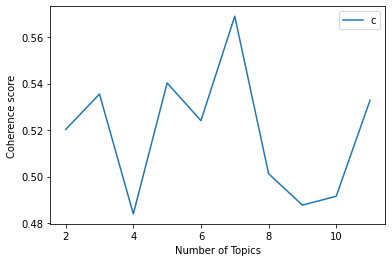

In [65]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
"""Topic Modelling can be evaluated by the concept of Topic Coherence, as topic models gives no guaranty on the interpretability
of their output.Topic modelling provides us with methods to organize, understand and summarize large collections of textual information. 
There are many techniques that are used to obtain topic models. 

Two among them are Latent Semantic Analysis(LSA) and Latent Dirichlet Allocation (LDA) .

For LDA:

LDA is a widely used topic modeling technique to extract topic from the textual data.
Topic models learn topics—typically represented as sets of important words—automatically from unlabelled documents in an unsupervised way. 
This is an attractive method to bring structure to otherwise unstructured text data, but Topics are not guaranteed to be well interpretable, therefore, coherence measures have been proposed to distinguish between good and bad topics.
We created dictionary and corpus required for Topic Modeling: The two main inputs to the LDA topic model are the dictionary and the corpus. Gensim creates a unique id for each word in the document.
In addition to the corpus and dictionary, we need to provide the number of topics as well.
LDA is an unsupervised technique, meaning that we don’t know prior to running the model how many topics exits in our corpus.We can use LDA visualization tool pyLDAvis, by trying a few numbers of topics and comparing the results.
Topic coherence is one of the main techniques used to estimate the number of topics.
We need to build many LDA models with different values of the number of topics (k) and pick the one that gives the highest coherence value. Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics.

The  plot of coherence value Vs number of topics shows that coherence score decreases with the number of topics, with a decline between 15 to 20.Now, choosing the number of topics still depends on our requirement because topic around 10 have good coherence scores but may have repeated keywords in the topic.
and also coherence value observed for the data using LDA algorithm is 0.76

For LSA:

LSA (Latent Semantic Analysis) also known as LSI (Latent Semantic Index). LSA uses bag of word(BoW) model, which results in a term-document matrix(occurrence of terms in a document).
LSA learns latent topics by performing a matrix decomposition on the document-term matrix using Singular value decomposition. LSA is typically used as a dimension reduction or noise reducing technique.
The best way to determine k (number of topics) in topic modeling, is by using Topic coherence measure which is a realistic measure for identifying the number of topics.
It uses the latent variable models. Each generated topic has a list of words. In topic coherence measure, we will find average/median of pairwise word similarity scores of the words in a topic. The high value of topic coherence score model will be considered as a good topic model.

The  plot of coherence value Vs number of topics shows that coherence score decreases with the number of topics. Of the number of topics, 7 have the highest coherence score, so the optimum number of topics are 7.
and also coherence value observed for the data using LDA algorithm is 0.54

So from the above analysis ,i could say that for the data i have taken LDA(Latent Dirichlet Allocation)gives better results with a optimum topic of 10 and coherence of 0.74